In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import root_mean_squared_error

In [2]:
train_df = pd.read_parquet('data/train.parquet')
y = np.log(train_df['Calories'] + 1)

In [3]:
y

0         5.017280
1         3.555348
2         3.401197
3         4.948760
4         4.990433
            ...   
749995    5.442418
749996    4.574711
749997    5.402677
749998    4.700480
749999    4.644391
Name: Calories, Length: 750000, dtype: float64

In [4]:
oof_folder = "l2_logs"

oof_preds = []
test_preds = []
best_score = 10
best_score_model = None
idx = 0
model_info = {
    "name": [],
    "rmse": [],
}
oof_preds_df = {}
test_preds_df = {}

for model_folder in os.listdir(oof_folder):
    for checkpoint in os.listdir(os.path.join(oof_folder, model_folder)):
        if checkpoint == ".DS_Store":
            continue
        for file in os.listdir(os.path.join(oof_folder, model_folder, checkpoint)):
            if file == ".DS_Store":
                continue
            folder = os.path.join(model_folder, checkpoint)
            if file not in ["oof.csv", "submission.csv"]:
                continue
            if file == "oof.csv":
                oof = pd.read_csv(os.path.join(oof_folder, folder, file))
                oof_pred = np.log(oof["Calories"].values + 1)
                rmse = root_mean_squared_error(y, oof_pred)
                oof_preds_df[folder] = oof_pred
                oof_preds.append(oof_pred)
                model_info["name"].append(folder)
                model_info["rmse"].append(rmse)

                print(f"==> {idx}: Loaded {file} from {folder} with RMSE: {rmse}")
                idx += 1
                if rmse < best_score:
                    best_score = rmse
                    best_score_model = len(oof_preds) - 1

            elif file == "submission.csv":
                test = pd.read_csv(os.path.join(oof_folder, folder, file))
                test_pred = np.log(test["Calories"].values + 1)
                test_preds_df[folder] = test_pred
                test_preds.append(test_pred)

==> 0: Loaded oof.csv from autogluon/rmse_0.05910 with RMSE: 0.05907592362236062
==> 1: Loaded oof.csv from cuml_rf/2025-05-29_17-02-37-rmse_0.05991 with RMSE: 0.05991505922779648
==> 2: Loaded oof.csv from cuml_rf/2025-05-29_16-57-16-rmse_0.14969 with RMSE: 0.14969342249100945
==> 3: Loaded oof.csv from cuml_rf/2025-05-29_17-01-08-rmse_0.06882 with RMSE: 0.068823517316622
==> 4: Loaded oof.csv from cuml_rf/2025-05-29_16-52-34-rmse_0.05907 with RMSE: 0.059068528566381125
==> 5: Loaded oof.csv from cuml_rf/2025-05-29_16-56-23-rmse_0.06622 with RMSE: 0.06622378961318624
==> 6: Loaded oof.csv from cuml_rf/2025-05-29_16-59-58-rmse_0.07974 with RMSE: 0.07974580106341728
==> 7: Loaded oof.csv from cuml_rf/2025-05-29_16-53-19-rmse_0.06115 with RMSE: 0.06115654223907549
==> 8: Loaded oof.csv from cuml_rf/2025-05-29_16-58-37-rmse_0.06071 with RMSE: 0.06071505592185371
==> 9: Loaded oof.csv from cuml_rf/2025-05-29_16-56-05-rmse_0.14965 with RMSE: 0.14964906500073777
==> 10: Loaded oof.csv from c

In [5]:
oof_preds_df = pd.DataFrame(oof_preds_df)
oof_preds_df

,autogluon/rmse_0.05910,cuml_rf/2025-05-29_17-02-37-rmse_0.05991,cuml_rf/2025-05-29_16-57-16-rmse_0.14969,cuml_rf/2025-05-29_17-01-08-rmse_0.06882,cuml_rf/2025-05-29_16-52-34-rmse_0.05907,cuml_rf/2025-05-29_16-56-23-rmse_0.06622,cuml_rf/2025-05-29_16-59-58-rmse_0.07974,cuml_rf/2025-05-29_16-53-19-rmse_0.06115,cuml_rf/2025-05-29_16-58-37-rmse_0.06071,cuml_rf/2025-05-29_16-56-05-rmse_0.14965,...,catboost/2025-05-28_15-42-53-rmse_0.05940,catboost/2025-05-28_16-54-43-rmse_0.05957,catboost/2025-05-28_18-03-13-rmse_0.05937,catboost/2025-05-28_16-38-01-rmse_0.05954,catboost/2025-05-28_18-36-25-rmse_0.05941,catboost/2025-05-28_19-02-55-rmse_0.05975,catboost/2025-05-28_16-06-59-rmse_0.05952,catboost/2025-05-28_15-05-31-rmse_0.05944,catboost/2025-05-28_17-18-46-rmse_0.05951,catboost/2025-05-28_19-27-13-rmse_0.05941
0,4.989036,4.990904,4.850052,4.991850,4.990787,4.990864,5.011988,4.989784,4.991396,4.850252,...,4.985862,4.981977,4.983749,4.990574,4.987708,4.992863,4.992569,4.987258,4.985962,4.989651
1,3.611866,3.607230,3.603056,3.651393,3.610252,3.602528,3.642815,3.628358,3.625609,3.602789,...,3.609996,3.608271,3.609929,3.613013,3.609810,3.618180,3.603939,3.606932,3.603361,3.611043
2,3.398269,3.396754,3.603056,3.409497,3.400043,3.417609,3.343402,3.398112,3.391043,3.602789,...,3.398521,3.389150,3.397617,3.380950,3.394455,3.392993,3.397209,3.393072,3.396626,3.394583
3,4.938471,4.936996,4.850052,4.914520,4.939276,4.936176,4.933970,4.930934,4.931549,4.850252,...,4.937440,4.929270,4.937827,4.934205,4.934787,4.942415,4.938875,4.938934,4.938994,4.940148
4,4.987645,4.987759,4.850124,4.991246,4.988818,4.991891,5.014843,4.978054,4.979875,4.850433,...,4.987628,4.975412,4.987152,4.993667,4.989734,4.984744,4.996065,4.985095,4.989937,4.987711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,5.404786,5.405470,5.228878,5.360530,5.402784,5.443445,5.411021,5.453931,5.464343,5.228968,...,5.402250,5.401443,5.400608,5.405376,5.402189,5.402139,5.402740,5.403785,5.401183,5.402121
749996,4.557623,4.558947,4.465573,4.556920,4.560375,4.561827,4.569210,4.565748,4.559505,4.465940,...,4.565043,4.568989,4.564483,4.554365,4.561675,4.557502,4.559316,4.565345,4.564134,4.565765
749997,5.465038,5.461807,5.230151,5.361251,5.460701,5.465880,5.442375,5.468035,5.465709,5.229923,...,5.459810,5.463067,5.456372,5.456229,5.463123,5.462040,5.462214,5.460560,5.463380,5.463277
749998,4.680550,4.677511,4.848645,4.700878,4.678958,4.700019,4.661561,4.677439,4.676767,4.848914,...,4.678969,4.673214,4.679716,4.677140,4.684310,4.682775,4.686754,4.676825,4.682388,4.676560


In [6]:
test_preds_df = pd.DataFrame(test_preds_df)
test_preds_df

,autogluon/rmse_0.05910,cuml_rf/2025-05-29_17-02-37-rmse_0.05991,cuml_rf/2025-05-29_16-57-16-rmse_0.14969,cuml_rf/2025-05-29_17-01-08-rmse_0.06882,cuml_rf/2025-05-29_16-52-34-rmse_0.05907,cuml_rf/2025-05-29_16-56-23-rmse_0.06622,cuml_rf/2025-05-29_16-59-58-rmse_0.07974,cuml_rf/2025-05-29_16-53-19-rmse_0.06115,cuml_rf/2025-05-29_16-58-37-rmse_0.06071,cuml_rf/2025-05-29_16-56-05-rmse_0.14965,...,catboost/2025-05-28_15-42-53-rmse_0.05940,catboost/2025-05-28_16-54-43-rmse_0.05957,catboost/2025-05-28_18-03-13-rmse_0.05937,catboost/2025-05-28_16-38-01-rmse_0.05954,catboost/2025-05-28_18-36-25-rmse_0.05941,catboost/2025-05-28_19-02-55-rmse_0.05975,catboost/2025-05-28_16-06-59-rmse_0.05952,catboost/2025-05-28_15-05-31-rmse_0.05944,catboost/2025-05-28_17-18-46-rmse_0.05951,catboost/2025-05-28_19-27-13-rmse_0.05941
0,3.342879,3.343332,3.244221,3.322655,3.342034,3.314692,3.342409,3.338128,3.334961,3.256877,...,3.351411,3.340764,3.352427,3.342481,3.350276,3.348970,3.347793,3.340486,3.347215,3.341114
1,4.693722,4.695835,4.849821,4.702064,4.696348,4.702589,4.670180,4.694466,4.688352,4.849874,...,4.701103,4.702933,4.700527,4.699823,4.696879,4.694785,4.699439,4.693952,4.692344,4.693073
2,4.480333,4.484660,4.466618,4.512571,4.484203,4.513207,4.487422,4.492015,4.488216,4.466746,...,4.486934,4.482250,4.487815,4.483977,4.484663,4.490157,4.482494,4.484715,4.485377,4.483014
3,4.840925,4.837218,4.849821,4.802151,4.837798,4.823265,4.842408,4.825535,4.823769,4.849874,...,4.837555,4.835730,4.838284,4.837998,4.837905,4.837127,4.834189,4.837398,4.838419,4.835435
4,4.340776,4.337519,4.466618,4.313054,4.338582,4.314926,4.354067,4.338892,4.336802,4.466746,...,4.336094,4.337840,4.336229,4.333946,4.336257,4.339376,4.332034,4.335115,4.337021,4.333619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,3.299976,3.297726,3.090429,3.282442,3.298684,3.290333,3.299423,3.306122,3.312318,3.090676,...,3.290608,3.295452,3.290740,3.304166,3.296745,3.295959,3.289666,3.292111,3.292313,3.294238
249996,2.352036,2.355854,2.442705,2.336322,2.360087,2.341832,2.358807,2.345854,2.374656,2.442181,...,2.349158,2.349042,2.349027,2.353311,2.350827,2.357984,2.350101,2.349588,2.346613,2.348950
249997,4.307665,4.302835,4.466618,4.313054,4.308194,4.314323,4.342798,4.296638,4.301112,4.466746,...,4.309394,4.307547,4.309139,4.304822,4.308409,4.305130,4.309110,4.307748,4.304816,4.306963
249998,5.131828,5.131554,5.229704,5.091542,5.132899,5.095009,5.115794,5.120042,5.118285,5.229713,...,5.130230,5.128736,5.131579,5.128390,5.133821,5.135313,5.135629,5.133038,5.129071,5.134858


In [7]:
save_preds = False
if save_preds:
    oof_preds_df["id"] = train_df["id"]
    test_preds_df["id"] = np.arange(len(test_preds_df)) + 750000
    oof_preds_df.to_parquet("data/l1_oof_preds.parquet", index=False)
    test_preds_df.to_parquet("data/l1_test_preds.parquet", index=False)

In [8]:
ranking = pd.DataFrame(model_info, index=range(len(model_info["name"]))).sort_values(by="rmse")
ranking

,name,rmse
118,hill_climbing/rmse_0.05863,0.058630
117,hill_climbing/rmse_0.05864,0.058642
115,hill_climbing/rmse_0.05865,0.058654
12,ridge/rmse_0.05868,0.058655
108,hill_climbing/rmse_0.05866,0.058659
...,...,...
62,cuml_knn/2025-05-29_15-46-24-rmse_0.10160,0.101600
63,cuml_knn/2025-05-29_16-19-34-rmse_0.10444,0.104437
64,cuml_knn/2025-05-29_16-06-26-rmse_0.10576,0.105757
9,cuml_rf/2025-05-29_16-56-05-rmse_0.14965,0.149649


## Hill climbing ensemble

In [31]:
best_score, best_score_model, len(oof_preds), len(test_preds)

(0.0586417613457426, 116, 127, 127)

In [32]:
import copy
cur_ensemble = copy.deepcopy(oof_preds[best_score_model])
cur_test_ensemble = copy.deepcopy(test_preds[best_score_model])
tol = 1e-7

score_trajectory = []
while True:
    best_model_index = None
    best_weight = None
    cur_best_rmse = root_mean_squared_error(y, cur_ensemble)
    score_trajectory.append(cur_best_rmse)
    best_rmse = cur_best_rmse
    for j in range(len(oof_preds)):
        weight_space = np.linspace(-1.0, 1.0, 200)
        for weight in weight_space:
            ensemble = cur_ensemble * (1 - weight) + oof_preds[j] * weight
            rmse = root_mean_squared_error(y, ensemble)
            if rmse < best_rmse:
                best_rmse = rmse
                best_weight = weight
                best_model_index = j

    delta = abs(cur_best_rmse - best_rmse)
    if best_model_index is not None and delta > tol:
        print(f"==> Score improved from {cur_best_rmse} to {best_rmse} by adding model {best_model_index} with weight {best_weight}")
        cur_ensemble = cur_ensemble * (1 - best_weight) + oof_preds[best_model_index] * best_weight
        cur_test_ensemble = cur_test_ensemble * (1 - best_weight) + test_preds[best_model_index] * best_weight
    else:
        print(f"==> No improvement found, stopping.")
        break

==> Score improved from 0.0586417613457426 to 0.05864160929236061 by adding model 67 with weight -0.015075376884422065
==> Score improved from 0.05864160929236061 to 0.05864122671932887 by adding model 92 with weight 0.025125628140703515
==> Score improved from 0.05864122671932887 to 0.05864083952476424 by adding model 67 with weight -0.025125628140703515
==> Score improved from 0.05864083952476424 to 0.058640248805791634 by adding model 116 with weight -1.0
==> Score improved from 0.058640248805791634 to 0.058639623462770435 by adding model 92 with weight 0.035175879396984966
==> Score improved from 0.058639623462770435 to 0.05863840657231622 by adding model 116 with weight -1.0
==> Score improved from 0.05863840657231622 to 0.058638026338026734 by adding model 71 with weight -0.025125628140703515
==> Score improved from 0.058638026338026734 to 0.058637584685887076 by adding model 93 with weight 0.025125628140703515
==> Score improved from 0.058637584685887076 to 0.05863644618870201 b

In [33]:
ensemble_rmse = root_mean_squared_error(y, cur_ensemble)
ensemble_rmse

0.0586297789941659

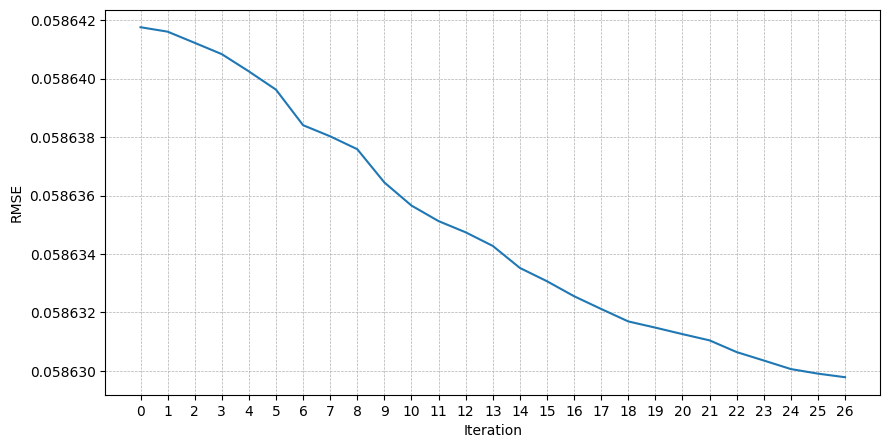

In [34]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)
iterations = np.arange(len(score_trajectory))
ax.plot(iterations, score_trajectory, label="Ensemble Score")
ax.set_xlabel("Iteration")
ax.set_ylabel("RMSE")
ax.set_xticks(iterations)
ax.grid(which='both', linestyle='--', linewidth=0.5)
plt.show()

In [35]:
if len(score_trajectory) > 1:
    save_dir = f"l2_logs/hill_climbing/rmse_{ensemble_rmse:.5f}"
    os.makedirs(save_dir, exist_ok=True)
    oof_ids = train_df["id"].values
    oof_df = pd.DataFrame({
        "id": oof_ids,
        "Calories": np.exp(cur_ensemble) - 1,
    })
    oof_df.to_csv(os.path.join(save_dir, "oof.csv"), index=False)

    test_ids = np.arange(len(cur_test_ensemble)) + 750000
    submission = pd.DataFrame({"id": test_ids, "Calories": np.exp(cur_test_ensemble) - 1})
    submission.to_csv(os.path.join(save_dir, "submission.csv"), index=False)

## Ridge

In [36]:
from sklearn.linear_model import RidgeCV

In [ ]:
model = RidgeCV(
    alphas=np.logspace(-5, 5, 100),
    cv=10,
    fit_intercept=False,
    scoring='neg_root_mean_squared_error',
)
model.fit(oof_preds_df, y)
print(f"Best alpha: {model.alpha_}")

Best alpha: 36.783797718286344
Best RMSE: 0.0586804958064739


In [43]:
np.sum(model.coef_)

np.float64(1.0000056053727187)

In [47]:
ranking["ridge_weight"] = np.array(model.coef_).flatten()
ranking = ranking.sort_values(by="ridge_weight", ascending=False)

In [48]:
ranking.to_csv("ridge_weights.csv", index=False)

In [ ]:
oof_preds = np.expm1(model.predict(oof_preds_df))
test_preds = np.expm1(model.predict(test_preds_df))

In [ ]:
meta_cv = root_mean_squared_error(y, oof_preds)
print(f"Meta CV RMSE: {meta_cv}")

In [ ]:
oof_df = pd.DataFrame({
    "id": train_df["id"].values,
    "Calories": oof_preds,
})
test_df = pd.DataFrame({
    "id": np.arange(len(test_preds)) + 750000,
    "Calories": test_preds,
})

In [40]:
oof_df

,id,Calories
0,0,147.547723
1,1,35.951291
2,2,29.015286
3,3,138.678510
4,4,146.054885
...,...,...
749995,749995,220.236892
749996,749996,94.461294
749997,749997,233.975328
749998,749998,106.413493


In [41]:
test_df

,id,Calories
0,750000,27.338195
1,750001,108.274617
2,750002,87.103452
3,750003,125.487866
4,750004,75.738901
...,...,...
249995,999995,26.134491
249996,999996,9.466130
249997,999997,73.144354
249998,999998,169.018770


In [42]:
save_dir = f"l2_logs/ridge/rmse_{meta_cv:.5f}"
os.makedirs(save_dir, exist_ok=True)

oof_df.to_csv(os.path.join(save_dir, "oof.csv"), index=False)
test_df.to_csv(os.path.join(save_dir, "submission.csv"), index=False)